# Análisis de sentimientos [TEXTBLOB]

<img align center src="sentimientos.jpg">

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()


In [2]:
txts = ['Im very happy',
        'To be thrilled',
        'I love sunny days', 
        'I love flowers', 
         'I hate the cold', 
        'Life is great', 
        'Thank you so much for everyhting',
        'cloudy days make me sad',
        'I do not like horror movies'
       ]

In [3]:
df = pd.DataFrame(txts, columns=['text'])

In [4]:
df

,text
0,Im very happy
1,To be thrilled
2,I love sunny days
3,I love flowers
4,I hate the cold
5,Life is great
6,Thank you so much for everyhting
7,cloudy days make me sad
8,I do not like horror movies


In [5]:
blob = TextBlob('Im very happy')
print(blob.sentences[0].sentiment.polarity)

1.0


In [6]:
def find_polarity(txt):
    blob = TextBlob(txt)
    return blob.sentences[0].sentiment.polarity

df['polarity'] = df['text'].apply(find_polarity)
df

,text,polarity
0,Im very happy,1.0
1,To be thrilled,0.6
2,I love sunny days,0.5
3,I love flowers,0.5
4,I hate the cold,-0.7
5,Life is great,0.8
6,Thank you so much for everyhting,0.2
7,cloudy days make me sad,-0.5
8,I do not like horror movies,0.0


In [7]:
 def find_sent(txt):
        if find_polarity(txt) > 0:
            return 'Positive'
        elif find_polarity(txt) == 0:
                return 'Neutral'
        elif find_polarity(txt) < 0:
            return 'Negative'
        else:
            pass

In [8]:
df['sentiments'] = df['text'].apply(find_sent)

In [9]:
df

,text,polarity,sentiments
0,Im very happy,1.0,Positive
1,To be thrilled,0.6,Positive
2,I love sunny days,0.5,Positive
3,I love flowers,0.5,Positive
4,I hate the cold,-0.7,Negative
5,Life is great,0.8,Positive
6,Thank you so much for everyhting,0.2,Positive
7,cloudy days make me sad,-0.5,Negative
8,I do not like horror movies,0.0,Neutral


In [10]:
values = df['sentiments'].value_counts().values
indexes = df['sentiments'].value_counts().index

<BarContainer object of 3 artists>

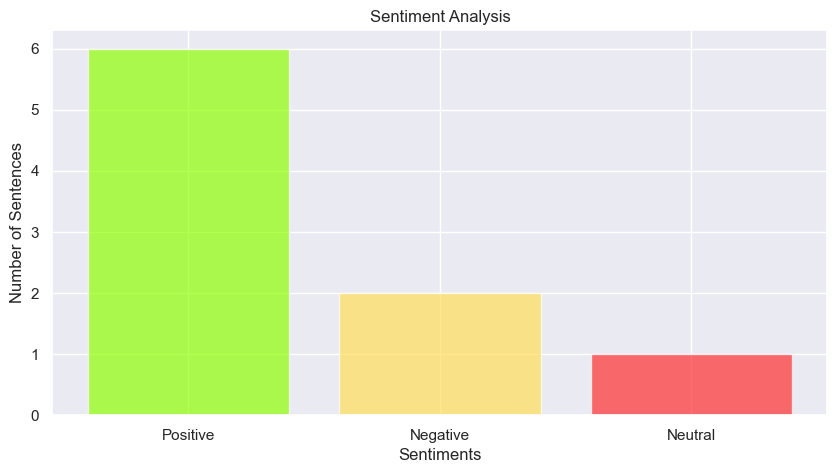

In [11]:
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Number of Sentences')
plt.bar(indexes,values, color=['#91FF05', '#FFDE59', '#FF3131'], alpha=0.7)

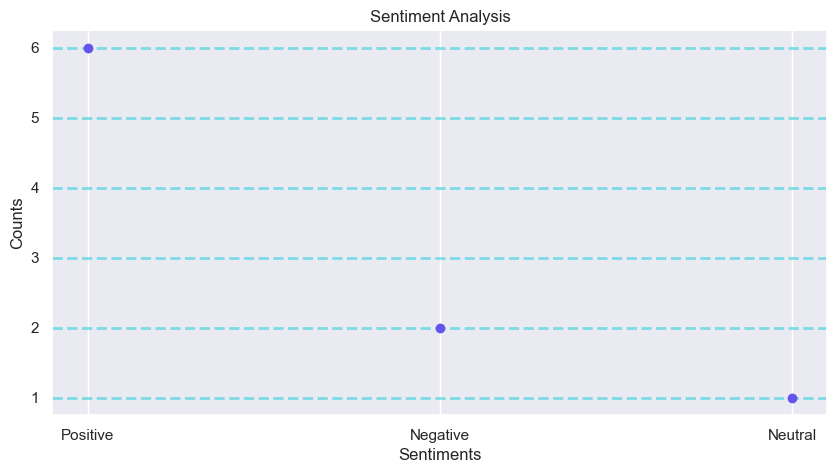

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.scatter(indexes,values, color='#6554EB', marker='o')
plt.grid(color='#51D4DD', linestyle='--', linewidth=2, axis='y', alpha=0.7)